In [1]:
from bs4 import BeautifulSoup as BS
from urllib.request import urlretrieve, urlopen, Request
import numpy as np
import requests

from IPython import display
from ipywidgets import widgets
from IPython.display import display, clear_output

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900'
r = requests.get(url)
html_doc = r.text
soup = BS(html_doc, 'html.parser')

Found the table class to reference: table class="sortable wikitable

In [3]:
#table class="sortable wikitable
for table in soup.find_all('table'):
    print (table.get('class'))

['plainlinks', 'metadata', 'ambox', 'ambox-content', 'ambox-multiple_issues', 'compact-ambox']
['plainlinks', 'metadata', 'ambox', 'ambox-content', 'ambox-Refimprove']
['plainlinks', 'metadata', 'ambox', 'ambox-style', 'ambox-Cleanup']
['plainlinks', 'metadata', 'ambox', 'ambox-content', 'ambox-Update']
['plainlinks', 'metadata', 'ambox', 'ambox-content']
['sortable', 'wikitable']


In [4]:
import pandas as pd 
quakes = pd.read_html(str(table),header=0)[0]
quakes.columns.values[1]= 'Country'
quakes

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1.0,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1.0,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86.0,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4.0,NaN,NaN


### strip characters
> alpha characters from Magnitude

> question marks from Lat, Long, Depth

> footnotes from Other Source and EM-DAT Deaths

In [5]:
pattern = r'\(.*\)|\[.*\]|\D'
quakes['Other Source Deaths'] = quakes['Other Source Deaths'].str.replace(pattern,"")
quakes['EM-DAT Total Deaths'] = quakes['EM-DAT Total Deaths'].str.replace(pattern,"")

mag_pattern = r'[^\.\d].*'
quakes['Magnitude'] = quakes['Magnitude'].str.replace(mag_pattern, "")

quakes['Other Source Deaths'] = pd.to_numeric(quakes['Other Source Deaths'])
quakes['EM-DAT Total Deaths'] = pd.to_numeric(quakes['EM-DAT Total Deaths'])
quakes['Magnitude'] = pd.to_numeric(quakes['Magnitude'])

In [6]:
lat_pattern = r'\?'
quakes['Lat'] = quakes['Lat'].replace(lat_pattern, np.nan, regex=True)
quakes['Long'] = quakes['Long'].replace(lat_pattern, np.nan, regex=True)
quakes['Depth (km)'] = quakes['Depth (km)'].replace(lat_pattern, np.nan, regex=True)
quakes['Lat'] = pd.to_numeric(quakes['Lat'])
quakes['Long'] = pd.to_numeric(quakes['Long'])
quakes['Depth (km)'] = pd.to_numeric(quakes['Depth (km)'])

In [7]:
quakes['Deaths'] = quakes[['PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Other Source Deaths']].max(axis=1)

In [8]:
#quakes['Country']
country_pattern = r'(, ?| ?\().*'
quakes['Country'] = quakes['Country'].str.replace(country_pattern, "")

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
# once cleaned Lat Long columns, ref http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/
def make_point(row):
    return Point(row.Long, row.Lat)

points = quakes.apply(make_point, axis=1)
quakes = gpd.GeoDataFrame(quakes, geometry=points)

quakes.crs = {'init': 'epsg:4326'}

A Jupyter Widget

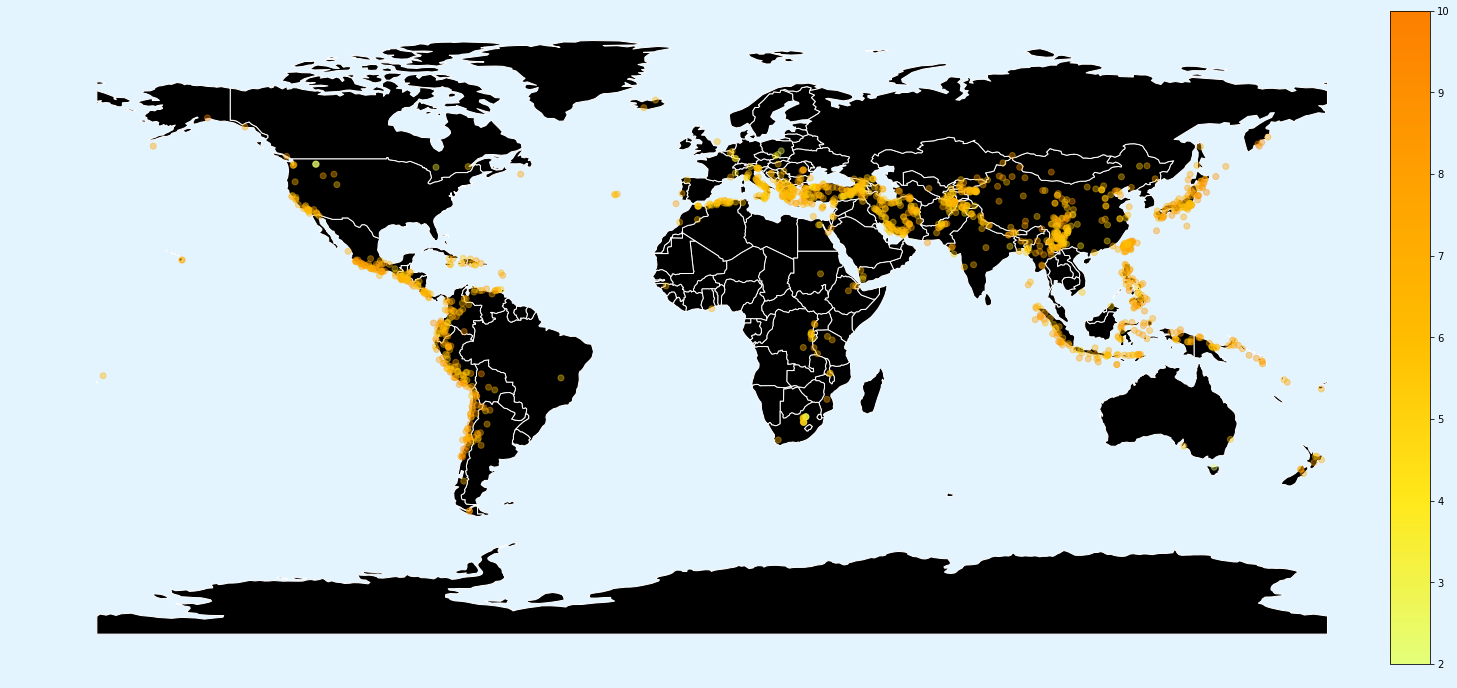

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable #imported for colorbar placement
#import traitlets
import warnings

## repeated below to re-display graph ##
ax = world.plot(color='black', edgecolor='white', figsize=(25,55))
ax.axis('off')
quakes.plot(ax=ax, column='Magnitude', alpha=0.4, cmap='Wistia');
fig = ax.get_figure()
fig.patch.set_facecolor('#e4f4ff')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.01)
sm = plt.cm.ScalarMappable(cmap='Wistia', norm=plt.Normalize(vmin=2.0, vmax=10.0))
sm._A = []
fig.colorbar(sm,cax=cax)
## repeated below to re-display graph ##

country = 'All'
maximum = '2.0'
minimum = '9.5'
world_copy = world.copy()

m = widgets.FloatRangeSlider(
    value=(0, 15),
    min=quakes['Magnitude'].min(),
    max=quakes['Magnitude'].max(),
    description='Magnitude',
    continuous_update=False,
)

countries = sorted(list(set(quakes.Country)))
countries.insert(0, 'ALL')
countries.remove("")

d = widgets.Dropdown(
    options=countries,
    value='ALL',
    description='Country',
    disabled=False,
)
z = widgets.HBox([m,d])
display(z)

def response(change):
    try:
        clear_output(wait=True)
        global country
        global maximum
        global minimum
        global world_copy
        if len(change['new']) == 2:
            maximum = change['new'][1]
            minimum = change['new'][0]
        else:
            country = change['new']
        display(z)
        if country.upper() == 'ALL':
            display_df = quakes[(quakes["Magnitude"] >= minimum) & (quakes['Magnitude'] <= maximum)]
            world_copy = world
        else:
            display_df = quakes[(quakes["Magnitude"] >= minimum) & (quakes['Magnitude'] <= maximum) & (quakes['Country'].str.upper() == country.upper())]
            world_copy = world[world['name'].str.upper() == country.upper()]
        
        ax = world_copy.plot(color='black', edgecolor='white', figsize=(25,55))
        ax.axis('off')
        display_df.plot(ax=ax, column='Magnitude', alpha=0.7, cmap='Wistia');
        fig = ax.get_figure()
        fig.patch.set_facecolor('#e4f4ff')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='3%', pad=0.01)
        sm = plt.cm.ScalarMappable(cmap='Wistia', norm=plt.Normalize(vmin=minimum, vmax=maximum)) 
        sm._A = []
        fig.colorbar(sm,cax=cax)
    except:
        print("Ain't no earthquakes of this magnitude in this country... Try again")
        warnings.filterwarnings('ignore')
            
m.observe(response, names='value')
d.observe(response, names='value')

# The break ----- above = confirmed ----- below = testing

# Working Widget: FloatSlider for Magnitude

In [12]:
### better mapping below ###

'''m = widgets.FloatRangeSlider(
    value=(0, 15),
    min=quakes['Magnitude'].min(),
    max=quakes['Magnitude'].max(),
    description='Magnitude',
    continuous_update=False,
)
display(m)

ax = world.plot(color='black', edgecolor='white', figsize=(25,55))
ax.axis('off')
quakes.plot(ax=ax, marker='*', color='orange', markersize=10);

def response(change):
    clear_output(wait=True)
    display(m)
    maximum = change['new'][1]
    minimum = change['new'][0]

    display_df = quakes[(quakes["Magnitude"] >= minimum) & (quakes['Magnitude'] <= maximum)]
    ax = world.plot(color='black', edgecolor='white', figsize=(25,55))
    ax.axis('off')
    display_df.plot(ax=ax, marker='*', color='orange', markersize=10);
        
m.observe(response, names='value')'''

'm = widgets.FloatRangeSlider(\n    value=(0, 15),\n    min=quakes[\'Magnitude\'].min(),\n    max=quakes[\'Magnitude\'].max(),\n    description=\'Magnitude\',\n    continuous_update=False,\n)\ndisplay(m)\n\nax = world.plot(color=\'black\', edgecolor=\'white\', figsize=(25,55))\nax.axis(\'off\')\nquakes.plot(ax=ax, marker=\'*\', color=\'orange\', markersize=10);\n\ndef response(change):\n    clear_output(wait=True)\n    display(m)\n    maximum = change[\'new\'][1]\n    minimum = change[\'new\'][0]\n\n    display_df = quakes[(quakes["Magnitude"] >= minimum) & (quakes[\'Magnitude\'] <= maximum)]\n    ax = world.plot(color=\'black\', edgecolor=\'white\', figsize=(25,55))\n    ax.axis(\'off\')\n    display_df.plot(ax=ax, marker=\'*\', color=\'orange\', markersize=10);\n        \nm.observe(response, names=\'value\')'

A Jupyter Widget

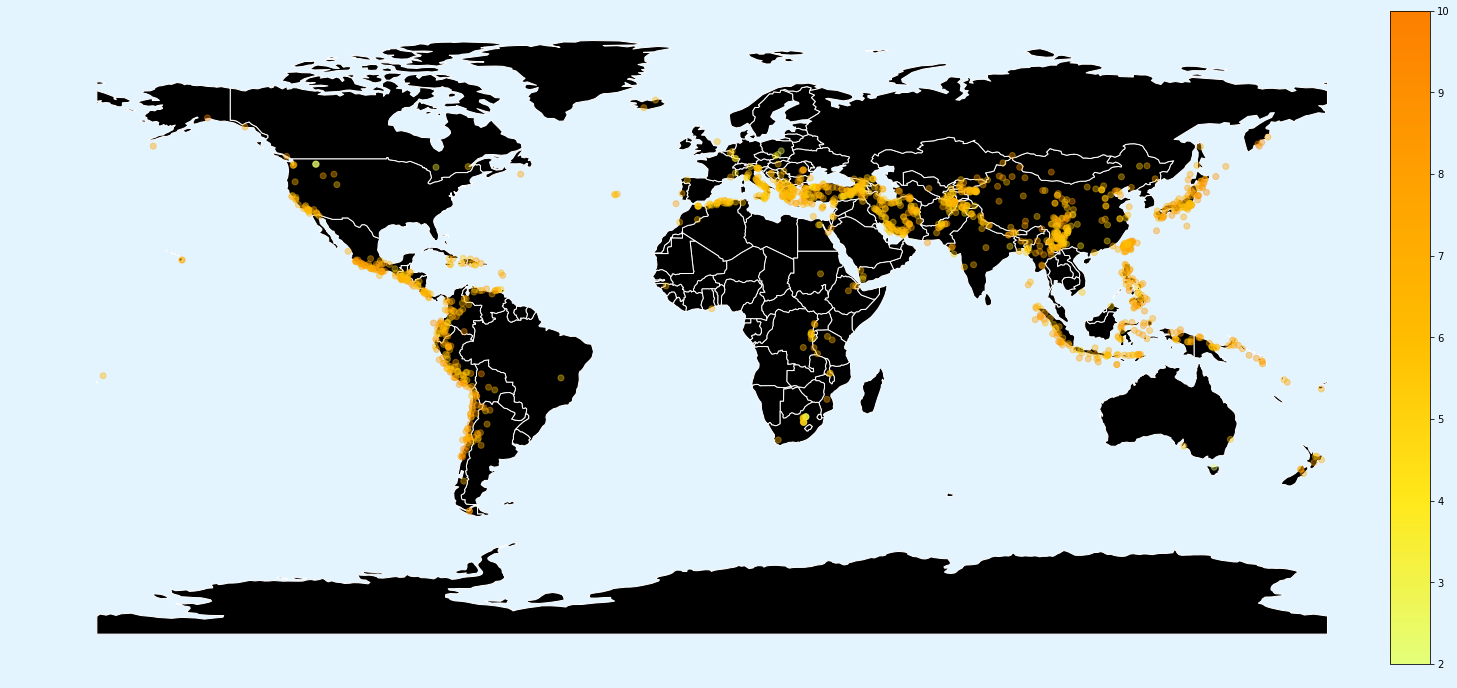

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable #imported for colorbar placement

m = widgets.FloatRangeSlider(
    value=(0, 15),
    min=quakes['Magnitude'].min(),
    max=quakes['Magnitude'].max(),
    description='Magnitude',
    continuous_update=False,
)
display(m)

## repeated below to re-display graph ##
ax = world.plot(color='black', edgecolor='white', figsize=(25,55))
ax.axis('off')
quakes.plot(ax=ax, column='Magnitude', alpha=0.4, cmap='Wistia');
fig = ax.get_figure()
fig.patch.set_facecolor('#e4f4ff')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.01)

sm = plt.cm.ScalarMappable(cmap='Wistia', norm=plt.Normalize(vmin=2.0, vmax=10.0))
sm._A = []
fig.colorbar(sm,cax=cax)
## repeated below to re-display graph ##


def response(change):
    clear_output(wait=True)
    display(m)
    maximum = change['new'][1]
    minimum = change['new'][0]

    display_df = quakes[(quakes["Magnitude"] >= minimum) & (quakes['Magnitude'] <= maximum)]
## repeat of above to re-display graph ##

    ax = world.plot(color='black', edgecolor='white', figsize=(25,55))
    ax.axis('off')
    display_df.plot(ax=ax, column='Magnitude', alpha=0.7, cmap='Wistia');
    fig = ax.get_figure()
    fig.patch.set_facecolor('#e4f4ff')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.01)
    sm = plt.cm.ScalarMappable(cmap='Wistia', norm=plt.Normalize(vmin=minimum, vmax=maximum)) 
## changing vmin/vmax to the new min/max inputs within the function resizes the colorbar to reflect current plots
    sm._A = []
    fig.colorbar(sm,cax=cax)
## repeat of above to re-display graph ##

m.observe(response, names='value')

In [14]:
'''import ipywidgets as widgets

from IPython.display import display
m = widgets.FloatRangeSlider()
m.value = quakes['Magnitude'].max()

display(m)'''

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


from IPython.display import display
def f(d, m):
    display(d + m)
    return d+m

m = widgets.FloatRangeSlider(
    value=(0, 15),
    min=quakes['Magnitude'].min(),
    max=quakes['Magnitude'].max(),
    description='Magnitude',
    continuous_update=False,
)
display(m)

d = widgets.Dropdown(
    options=['coolwarm', 'seismic', 'bwr'],
    value='seismic',
    description='cmap',
    disabled=False,
)
display(d)


A Jupyter Widget

A Jupyter Widget

## adding date range widget

In [15]:
'''
from mpl_toolkits.axes_grid1 import make_axes_locatable #imported for colorbar placement

m = widgets.FloatRangeSlider(
    value=(0, 15),
    min=quakes['Magnitude'].min(),
    max=quakes['Magnitude'].max(),
    description='Magnitude',
    continuous_update=False,
)
display(m)


d_countries = sorted(set(list(quakes.Country)))

d = widgets.Dropdown(
    options=d_countries,
    value='China',
    description='cmap selection',
    disabled=False,
)
display(d)

## repeated below to re-display graph ##
ax = world.plot(color='black', edgecolor='silver', figsize=(25,55))
ax.axis('off')
quakes.plot(ax=ax, column='Magnitude', alpha=0.4, cmap='Wistia');
fig = ax.get_figure()
fig.patch.set_facecolor('#e4f4ff')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.01)

sm = plt.cm.ScalarMappable(cmap='Wistia', norm=plt.Normalize(vmin=2.0, vmax=10.0))
sm._A = []
fig.colorbar(sm,cax=cax)
## repeated below to re-display graph ##

def response(change):
    clear_output(wait=True)
#    display(m)
    display(d)
    maximum = change['new'][1]
    minimum = change['new'][0]
    c_select = change['new'][2]
    print(change)

    display_df = quakes[(quakes["Magnitude"] >= minimum) & (quakes['Magnitude'] <= maximum)]
## repeat of above to re-display graph ##
    ax = world.plot(color='#cfd1d3', edgecolor='black', figsize=(25,55))
    ax.axis('off')
    display_df.plot(ax=ax, column='Magnitude', alpha=0.7, cmap='Wistia');
    fig = ax.get_figure()
    fig.patch.set_facecolor('#e4f4ff')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.01)
    sm = plt.cm.ScalarMappable(cmap='Wistia', norm=plt.Normalize(vmin=minimum, vmax=maximum)) 
## changing vmin/vmax to the new min/max inputs within the function resizes the colorbar to reflect current plots
    sm._A = []
    fig.colorbar(sm,cax=cax)
## repeat of above to re-display graph ##

d.observe(response, names='value')''';

In [16]:
#testing before adding ipywidget
'''from mpl_toolkits.axes_grid1 import make_axes_locatable #imported for colorbar placement

ax = world.plot(color='#cfd1d3', edgecolor='black', figsize=(25,55))
ax.axis('off')

quakes.plot(ax=ax, column='Magnitude', alpha=0.4, cmap='seismic', );
fig = ax.get_figure()

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.01)

sm = plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(vmin=2.0, vmax=10.0))
sm._A = []
fig.colorbar(sm,cax=cax)'''

"from mpl_toolkits.axes_grid1 import make_axes_locatable #imported for colorbar placement\n\nax = world.plot(color='#cfd1d3', edgecolor='black', figsize=(25,55))\nax.axis('off')\n\nquakes.plot(ax=ax, column='Magnitude', alpha=0.4, cmap='seismic', );\nfig = ax.get_figure()\n\ndivider = make_axes_locatable(ax)\ncax = divider.append_axes('right', size='3%', pad=0.01)\n\nsm = plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(vmin=2.0, vmax=10.0))\nsm._A = []\nfig.colorbar(sm,cax=cax)"

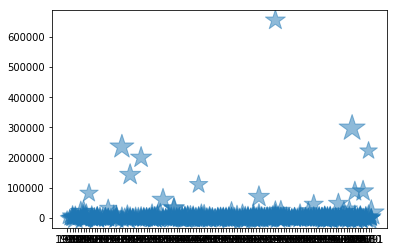

In [17]:
quakes['year'] = quakes['Origin (UTC)'].str[:4]
death_mag_by_year = quakes.groupby(['year','Magnitude'])['Deaths'].sum()
death_mag_by_year=death_mag_by_year.reset_index()
death_mag_by_year

plt.scatter(death_mag_by_year['year'], death_mag_by_year['Deaths'], marker='*', alpha=0.5, s=death_mag_by_year['Magnitude']**3)


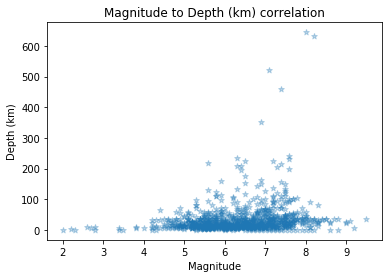

In [18]:
mag_dep = quakes.groupby(['Magnitude','Depth (km)'])['Deaths'].sum()
mag_dep=mag_dep.reset_index()
mag_dep
plt.title('Magnitude to Depth (km) correlation')
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.scatter(mag_dep['Magnitude'],mag_dep['Depth (km)'], marker='*', alpha=0.3)#, s=mag_dep['Deaths'])


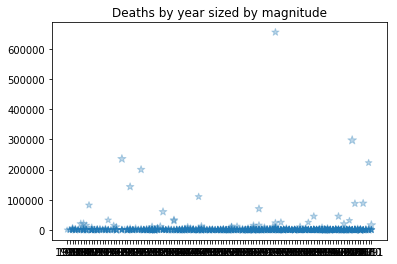

In [19]:
plt.title('Deaths by year sized by magnitude')
plt.scatter(quakes['year'], quakes['Deaths'], marker='*', alpha=0.3, s=quakes['Magnitude']**2)

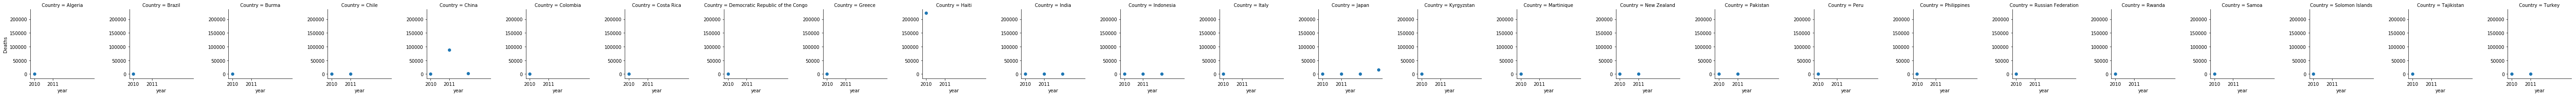

In [20]:
df_agg = quakes.groupby(['Country','year'], as_index=False)['Deaths'].sum()
#df_agg.reset_index()
df_agg = pd.DataFrame(df_agg)
df_agg.reset_index()

last5_df = df_agg.loc[df_agg['year'].isin(['2007','2008','2009','2010','2011'])]
last5_df

import seaborn as sns
plot = sns.FacetGrid(last5_df, col='Country')
#plt.xticks([2007,2008,2009,2010,2011])
plot.map(plt.scatter,'year','Deaths')

plt.show()


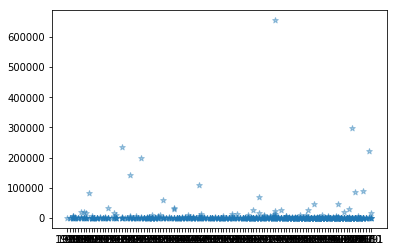

In [21]:
#import seaborn as sns
#sns.FacetGrid(df_agg, col='Country')

plt.scatter(df_agg['year'],df_agg['Deaths'], marker='*', alpha=0.4);

In [22]:
quake_by_country = quakes.groupby(['Country','year','Magnitude','Deaths'])['Country'].count


In [23]:
quake_by_country

<bound method SeriesGroupBy.count of <pandas.core.groupby.SeriesGroupBy object at 0x7f6fed0a9a20>>

In [24]:
quakes.loc[quakes['Magnitude'] >= 9.0]

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Deaths,geometry,year
332,1952-11-04 16:58,Russian Federation,52.755,160.057,22.2,9.0,T,NaN,NaN,NaN,NaN,NaN,NaN,POINT (160.057 52.755),1952
396,1960-05-22 19:11,Chile,-38.235,-73.047,35.0,9.5,T,NaN,NaN,5700.0,6000.0,NaN,6000.0,POINT (-73.047 -38.235),1960
416,1964-03-28 03:36,United States,61.017,-147.648,6.6,9.2,T,NaN,NaN,131.0,131.0,NaN,131.0,POINT (-147.648 61.017),1964
1238,2004-12-26 00:58,Indonesia,3.287,95.972,30.0,9.1,"T,L",NaN,297200.0,NaN,NaN,231000.0,297200.0,POINT (95.97200000000001 3.287),2004
1335,2011-03-11 14:46,Japan,38.322,142.369,24.4,9.0,T,NaN,NaN,NaN,NaN,15894.0,15894.0,POINT (142.369 38.322),2011


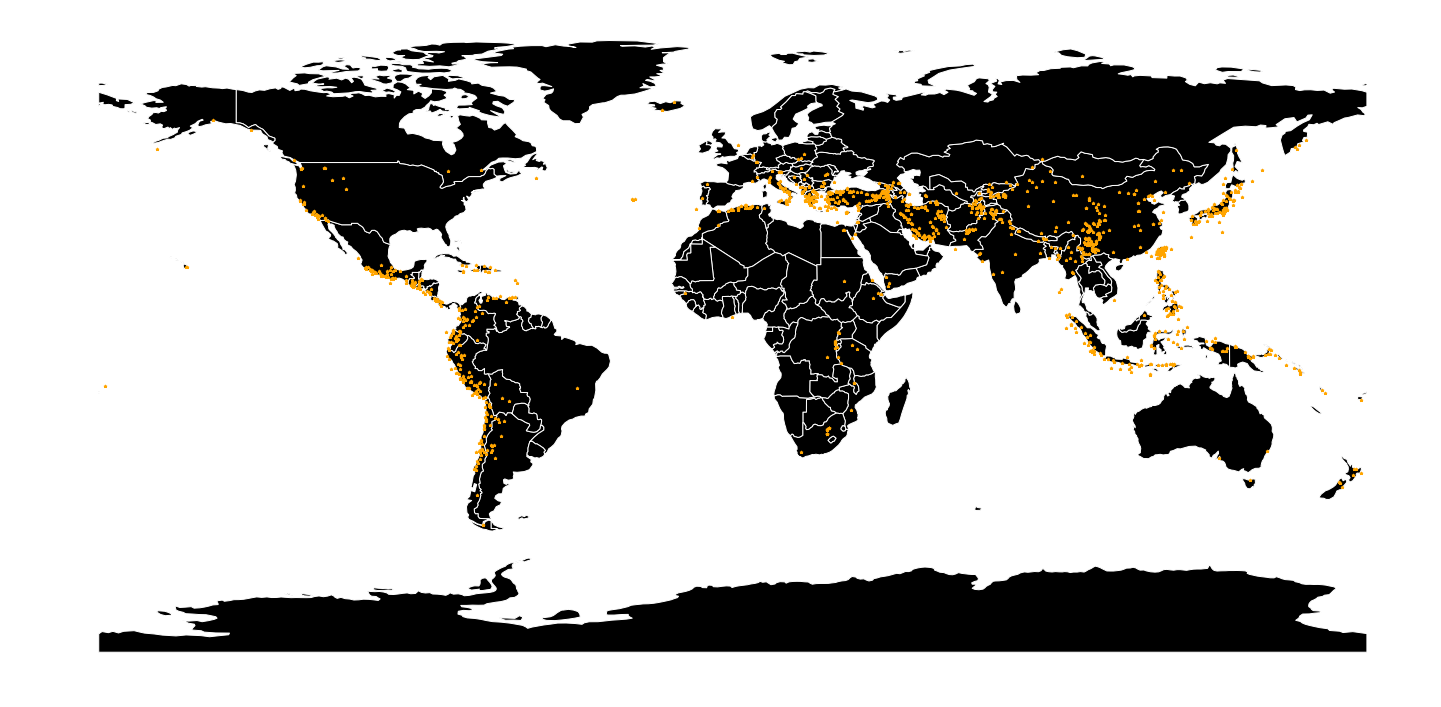

In [25]:
#### basic mapping before adding widgets ####
ax = world.plot(color='black', edgecolor='white', figsize=(25,55))
ax.axis('off')
quakes.plot(ax=ax, marker='*', color='orange', markersize=8);